### Setting the NOISE condition of 5 times glitch and 60dB noise

In [2]:
import numpy as np
import pandas as pd
from SignalProcessor import SignalProcessorClass
import NoiseEvalUtil as NEUtil
import argparse
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", "Possible clipped samples in output.")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [7]:
Reggea_Mixing_Path = '/home/codecrack/Jnotebook/48k_16bit/Reggea'
Reggea_Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Reggea_Mixing_Path, TrackType = NEUtil.MixingType.File)
Reggea_Referece_File_48k_16bit = Reggea_Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Reference.wav")
Reggea_Referece_File_48k_16bit

Audio duration orginal is 17.462666666666667 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.002002604166666667, 769)


'/home/codecrack/Jnotebook/48k_16bit/Reggea/Mixing_Result/Reference.wav'

In [8]:
score = Reggea_Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(Reggea_Referece_File_48k_16bit,64,Reggea_Referece_File_48k_16bit)
print(f"PEAQ Result in no inference is {score}")

PEAQ Result in no inference is -0.855


In [9]:
Reggea_Mp3_Referece_File_48k_16bit = "/home/codecrack/Jnotebook/48k_16bit/Reggea/Mixing_Result_Mp3_Wav/Reference_64kbps.wav"

#### PEAQ Basic version

In [12]:
solution = [60,60,0,5]
hn = solution[0]
wn = solution[1]
cp = solution[2]
do = solution[3]

Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'

PEAQbasic_list_Noise = []
#Visqool_list = []
for x in range(1,100):
    Gener_Audio = Reggea_Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
    score = Reggea_Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(Gener_Audio,64,Reggea_Mp3_Referece_File_48k_16bit)
    PEAQbasic_list_Noise.append(float(score))
    print(f"PEAQ Result is {score}")

The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
PEAQ Result is -3.206
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
PEAQ Result is -3.602
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, t

In [13]:
PEAQBasic_Score = pd.DataFrame({'PEAQBasic_Score': PEAQbasic_list_Noise})
PEAQBasic_Score = PEAQBasic_Score.apply(pd.to_numeric, errors='coerce')

#### PEMO 

In [15]:
solution = [60,60,0,5]
hn = solution[0]
wn = solution[1]
cp = solution[2]
do = solution[3]

Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}'

for x in range(1,100):
    PEMOFILE = f'{Noisefilename}_{x}.wav'
    Gener_Audio = Reggea_Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,PEMOFILE)
    Gener_Audio_mp3 = Reggea_Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Gener_Audio,64)

The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, 

In [22]:
PEMO_Score = np.loadtxt('/home/codecrack/Jnotebook/48k_16bit/Reggea/Metric/PEMO/Randomness_PEMOODG.csv', delimiter=',')
PEMO_Score = pd.DataFrame({'PEMO_Score': PEMO_Score})

#### HAAQI

In [16]:
import clarity
import clarity.evaluator.haaqi as haaqi
import librosa
from clarity.utils.audiogram import Audiogram

In [17]:
levels_1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
audiogram_NH = Audiogram(levels=levels_1)

In [19]:
solution = [60,60,0,5]
hn = solution[0]
wn = solution[1]
cp = solution[2]
do = solution[3]

Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'
Mp3_Referece_data, sample_rate = librosa.load(Reggea_Mp3_Referece_File_48k_16bit, sr=None)

Haaqi_list = []
#Visqool_list = []
for x in range(1,100):
    Gener_Audio = Reggea_Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
    Gener_Audio_mp3 = Reggea_Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Gener_Audio,64)
    Gener_Audio_mp3_HAAQI, sample_rate = librosa.load(Gener_Audio_mp3, sr=None)
    HAAQI_score = round(haaqi.compute_haaqi(Gener_Audio_mp3_HAAQI,Mp3_Referece_data,sample_rate,sample_rate,audiogram_NH),2)
    Haaqi_list.append(HAAQI_score)
    print(f"HAAQI Result is {HAAQI_score}")

The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
HAAQI Result is 0.88
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the mixing ouput in the RMS, Total: -9.11dB, Clipping Ratio&Cliped Num: (0.0020078125, 771)
HAAQI Result is 0.87
The original level of signal is 0.05805440992116928
The noise level of signal is 5.805440992116928e-05
There are 0 samples are 0
There is 0 zero samples before
There are 12000 packages
There are 160 samples are 0
There is 160 zero samples after
After LUFS, the

In [21]:
HAAQI_Score = pd.DataFrame({'HAAQI_Score': Haaqi_list})
HAAQI_Score = HAAQI_Score.apply(pd.to_numeric, errors='coerce')
HAAQI_Score

,HAAQI_Score
0,0.88
1,0.87
2,0.87
3,0.88
4,0.87
...,...
94,0.87
95,0.85
96,0.89
97,0.86


In [23]:
combined_df = pd.concat([PEAQBasic_Score, PEMO_Score, HAAQI_Score], axis=1)
# Output to CSV
##First Four Columns is vs Wav, rest four columns is vs mp3
combined_df.to_csv('Dataset/Randomness_on_MetricResult.csv', index=False)

### Reading Content From CSV

In [3]:
combined_df_Norm = pd.read_csv('Dataset/Randomness_on_MetricResult.csv')
combined_df_Norm

,PEAQBasic_Score,PEMO_Score,HAAQI_Score
0,-3.206,-1.16890,0.88
1,-3.602,-1.04920,0.87
2,-3.135,-1.21290,0.87
3,-3.321,-1.07460,0.88
4,-3.489,-1.04360,0.87
...,...,...,...
94,-2.941,-1.11050,0.87
95,-3.267,-0.99884,0.85
96,-2.241,-1.05870,0.89
97,-3.107,-0.94609,0.86


In [4]:
###To normalised the data column
columns_to_normalize = ['PEAQBasic_Score', 'PEMO_Score']
combined_df_Norm[columns_to_normalize] = (combined_df_Norm[columns_to_normalize] +4) / 4
combined_df_Norm

,PEAQBasic_Score,PEMO_Score,HAAQI_Score
0,0.19850,0.707775,0.88
1,0.09950,0.737700,0.87
2,0.21625,0.696775,0.87
3,0.16975,0.731350,0.88
4,0.12775,0.739100,0.87
...,...,...,...
94,0.26475,0.722375,0.87
95,0.18325,0.750290,0.85
96,0.43975,0.735325,0.89
97,0.22325,0.763478,0.86


/tmp/ipykernel_38442/1193989888.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df_Norm_long,x='Normalised Score', y='Metrics',orient='h',palette=palette,notch=True, showcaps=False,)


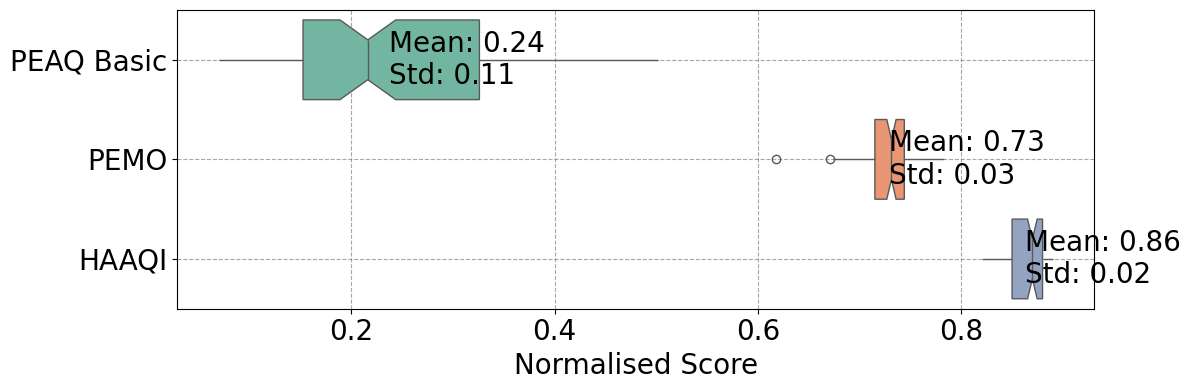

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Rename conditions
rename_map = {'PEAQBasic_Score': 'PEAQ Basic','PEMO_Score': 'PEMO','HAAQI_Score': 'HAAQI'}
combined_df_Norm_long = pd.melt(combined_df_Norm, var_name='Metrics', value_name='Normalised Score')
combined_df_Norm_long['Metrics'] = combined_df_Norm_long['Metrics'].replace(rename_map)

palette = sns.color_palette("Set2", n_colors=len(combined_df_Norm_long['Metrics'].unique()))
plt.figure(figsize=(12, 4))

# Draw a boxplot for all columns in the DataFrame
ax = sns.boxplot(data=combined_df_Norm_long,x='Normalised Score', y='Metrics',orient='h',palette=palette,notch=True, showcaps=False,)
metrics_order = [label.get_text() for label in ax.get_yticklabels()]
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
# Add mean and std to the plot as text
grouped = combined_df_Norm_long.groupby('Metrics')
grouped = {key: grouped.get_group(key) for key in metrics_order}

for i, (condition_name, data) in enumerate(grouped.items()):
    #condition_name, data = condition
    mean = data['Normalised Score'].mean()
    std = data['Normalised Score'].std()
    
    # Place the text in the middle of the box
    ax.text(mean, i, f"Mean: {mean:.2f}\nStd: {std:.2f}",
            horizontalalignment='left', verticalalignment='center', fontsize=20, color='black')

# Add title and labels
#plt.title('Under the Fix perturbations with 60dB random nosie and 3 times package lost', fontsize=16)
ax.tick_params(axis='x', labelsize=20)  # Change x-axis tick label size
ax.tick_params(axis='y', labelsize=20)  # Change y-axis tick label size
plt.xlabel('Normalised Score', fontsize=20)
plt.ylabel('', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()